# Seasonal Arima (SARIMA)

## Importing Necessary Modules

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

## Importing and Processing Data

In [127]:
df = pd.read_csv('regular_dataset_r3_2xlarge_us-east-1b.csv')
df

,Unnamed: 0,Time,Price
0,0,2021-04-03,0.137033
1,1,2021-04-04,0.137575
2,2,2021-04-05,0.138600
3,3,2021-04-06,0.139000
4,4,2021-04-07,0.140125
...,...,...,...
81,81,2021-06-23,0.158100
82,82,2021-06-24,0.157633
83,83,2021-06-25,0.158100
84,84,2021-06-26,0.157200


In [128]:
df = df.drop("Unnamed: 0", axis=1)
df

,Time,Price
0,2021-04-03,0.137033
1,2021-04-04,0.137575
2,2021-04-05,0.138600
3,2021-04-06,0.139000
4,2021-04-07,0.140125
...,...,...
81,2021-06-23,0.158100
82,2021-06-24,0.157633
83,2021-06-25,0.158100
84,2021-06-26,0.157200


In [129]:
df.describe()

,Price
count,86.000000
mean,0.148951
std,0.004974
min,0.137033
25%,0.145317
50%,0.149721
75%,0.152087
max,0.158100


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    86 non-null     object 
 1   Price   86 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [131]:
df['Time'] = pd.to_datetime(df.Time)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    86 non-null     datetime64[ns]
 1   Price   86 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 KB


In [132]:
df.head()

,Time,Price
0,2021-04-03,0.137033
1,2021-04-04,0.137575
2,2021-04-05,0.138600
3,2021-04-06,0.139000
4,2021-04-07,0.140125


In [133]:
df.set_index('Time', inplace=True)

In [134]:
df.head()

,Price
Time,
2021-04-03,0.137033
2021-04-04,0.137575
2021-04-05,0.138600
2021-04-06,0.139000
2021-04-07,0.140125


## Visualising Data

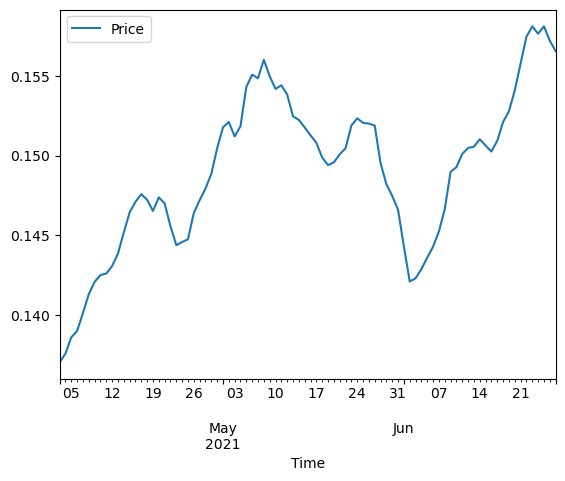

In [135]:
df.plot()
plt.show()

## Checking Stationarity

In [136]:
from pmdarima.arima import ADFTest

In [137]:
adf_test = ADFTest(alpha=0.05)
print(adf_test)
adf_test.should_diff(df)

ADFTest()


(0.3323894950878278, True)

## Train and Test Split

In [138]:
n = int(len(df) * 0.8)

In [139]:
train = df.Price[:n]
test = df.Price[n:]
print(f"For Training\n{train}\n")
print(f"For Testing\n{test}")

For Training
Time
2021-04-03    0.137033
2021-04-04    0.137575
2021-04-05    0.138600
2021-04-06    0.139000
2021-04-07    0.140125
                ...   
2021-06-05    0.143600
2021-06-06    0.144280
2021-06-07    0.145233
2021-06-08    0.146625
2021-06-09    0.148975
Name: Price, Length: 68, dtype: float64

For Testing
Time
2021-06-10    0.149267
2021-06-11    0.150100
2021-06-12    0.150475
2021-06-13    0.150550
2021-06-14    0.151020
2021-06-15    0.150625
2021-06-16    0.150250
2021-06-17    0.150920
2021-06-18    0.152100
2021-06-19    0.152775
2021-06-20    0.154075
2021-06-21    0.155767
2021-06-22    0.157440
2021-06-23    0.158100
2021-06-24    0.157633
2021-06-25    0.158100
2021-06-26    0.157200
2021-06-27    0.156550
Name: Price, dtype: float64


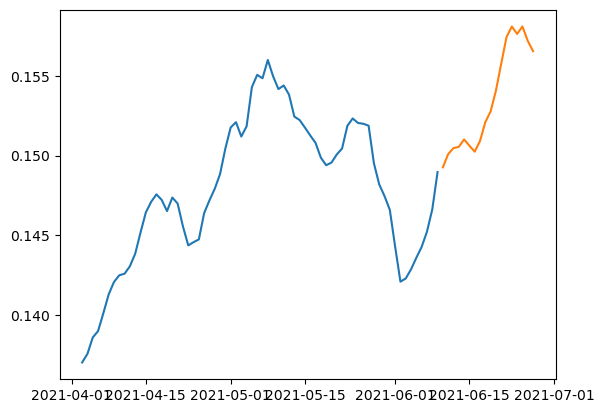

In [140]:
plt.plot(train)
plt.plot(test)
plt.show()

## Arima Model

In [141]:
arima_model=auto_arima (train, start_p=3, d=1, start_q=3, max_p=3,
                        max_d=1, max_q=3, start_P=0, D=1, start_Q=0,
                        max_P=5, max_D=5, max_Q=5, m=4, seasonal=True,
                        error_action='warn', trace = True, 
                        supress_warnings=True, stepwise = True, 
                        random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,1,0)[4]             : AIC=-679.279, Time=0.06 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=-660.396, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=-679.515, Time=0.02 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=-685.253, Time=0.02 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=-683.172, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=-683.046, Time=0.02 sec
 ARIMA(0,1,1)(0,1,2)[4]             : AIC=-695.918, Time=0.11 sec
 ARIMA(0,1,1)(1,1,2)[4]             : AIC=-693.357, Time=0.09 sec
 ARIMA(0,1,1)(0,1,3)[4]             : AIC=-665.053, Time=0.17 sec
 ARIMA(0,1,1)(1,1,3)[4]             : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,1,2)[4]             : AIC=-675.272, Time=0.28 sec
 ARIMA(1,1,1)(0,1,2)[4]             : AIC=-692.049, Time=0.53 sec
 ARIMA(0,1,2)(0,1,2)[4]             : AIC=-693.707, Time=0.23 sec
 ARIMA(1,1,0)(0,1,2)[4]             : AIC=-692.617, Time=0.21 sec
 ARIMA(1,1,2)(0,1,2)[4]             : 

In [142]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                   68
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 4)   Log Likelihood                 351.959
Date:                                Wed, 29 Nov 2023   AIC                           -695.918
Time:                                        17:59:38   BIC                           -687.345
Sample:                                    04-03-2021   HQIC                          -692.546
                                         - 06-09-2021                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6072      0.156      3.899      0.000       0.302       0.912
ma.S.L4       -0.2816      0.164     -1.721      0.085      -0.602       0.039
ma.S.L8       -0.5176      0.142     -3.646      0.000      -0.796      -0.239
sigma2      7.631e-07    1.5e-07      5.082      0.000    4.69e-07    1.06e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 3.44
Prob(Q):                              0.61   Prob(JB):                         0.18
Heteroskedasticity (H):               1.49   Skew:                            -0.48
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forecasting

In [143]:
prediction = pd.DataFrame(arima_model.predict(n_periods=18), 
                          index=test.index)
prediction_columns = ['predicted_price']
prediction

,0
Time,
2021-06-10,0.150630
2021-06-11,0.151199
2021-06-12,0.151989
2021-06-13,0.153143
2021-06-14,0.153581
2021-06-15,0.153803
2021-06-16,0.154153
2021-06-17,0.154430
2021-06-18,0.154500


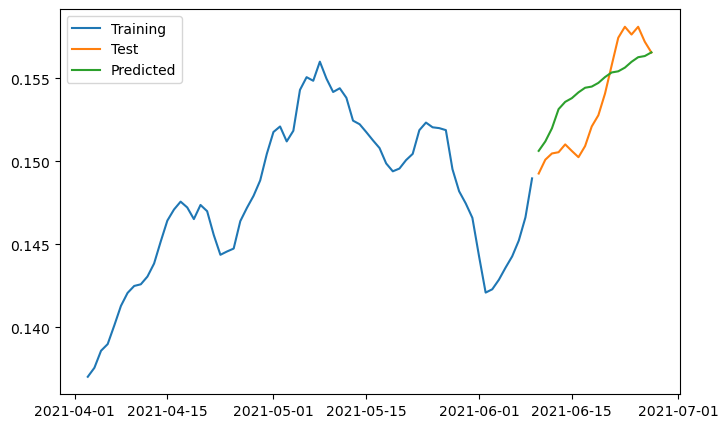

In [152]:
plt.figure(figsize=(8, 5))
plt.plot(train, label="Training")
plt.plot(test, label='Test')
plt.plot(prediction, label="Predicted")
plt.legend(loc="upper left")
plt.savefig("r3_2xlarge_us_east_test_vs_predicted.png")
plt.show()

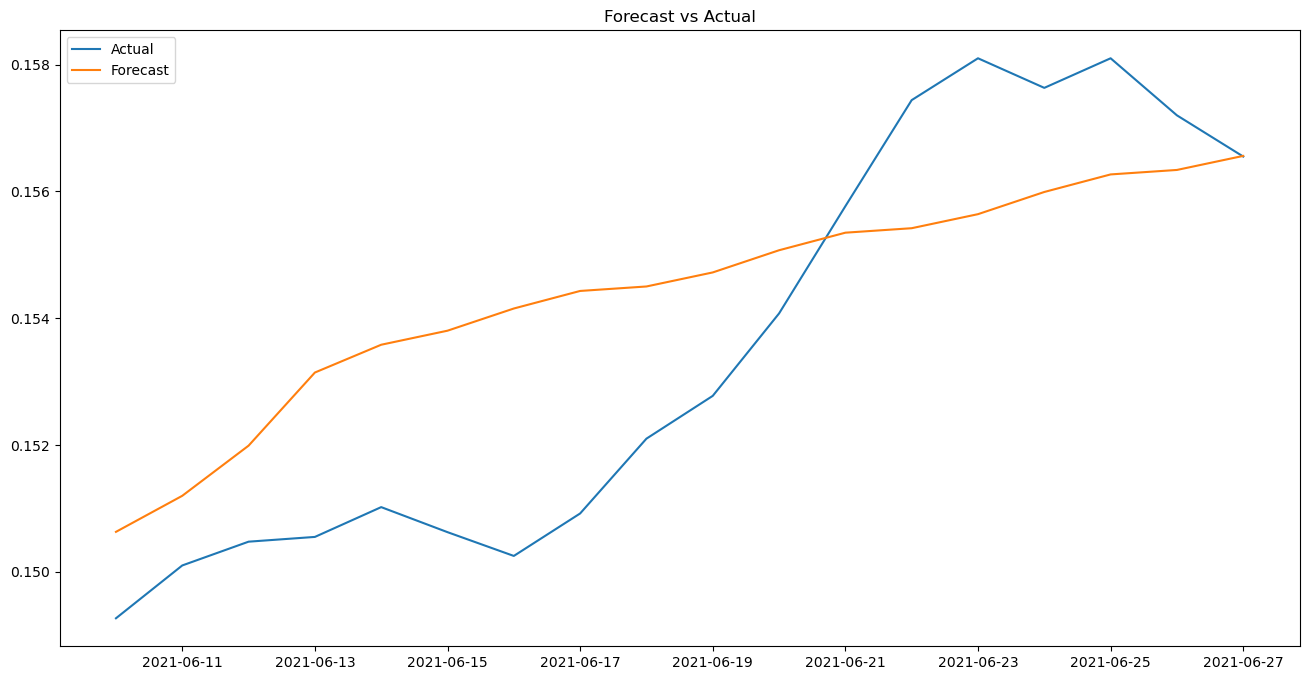

In [153]:
step = 18

# fc = pd.Series(fc, index=test[:step].index)
# print(fc)
plt.figure(figsize=(16, 8))

plt.plot(test[:step], label="Actual")

plt.plot(prediction, label="Forecast")

plt.title("Forecast vs Actual")
plt.legend(loc="upper left")
plt.savefig("r3_2xlarge_us_east_test_vs_predicted_zoomed.png")
plt.show()

## R2 Score

In [146]:
test_df = pd.DataFrame(test)
test_df
# test['predicted_prices'] = prediction

,Price
Time,
2021-06-10,0.149267
2021-06-11,0.150100
2021-06-12,0.150475
2021-06-13,0.150550
2021-06-14,0.151020
2021-06-15,0.150625
2021-06-16,0.150250
2021-06-17,0.150920
2021-06-18,0.152100


In [147]:
test_df['predicted_prices'] = prediction
test_df = test_df.dropna()
test_df

,Price,predicted_prices
Time,,
2021-06-10,0.149267,0.150630
2021-06-11,0.150100,0.151199
2021-06-12,0.150475,0.151989
2021-06-13,0.150550,0.153143
2021-06-14,0.151020,0.153581
2021-06-15,0.150625,0.153803
2021-06-16,0.150250,0.154153
2021-06-17,0.150920,0.154430
2021-06-18,0.152100,0.154500


In [148]:
r2_score(test_df['Price'], test_df['predicted_prices'])

0.5458721207346111

In [149]:
np.sqrt(mean_squared_error(test_df['Price'], test_df['predicted_prices']))

0.0021595089571827524

In [150]:
test_df.predicted_prices.describe()

count    18.000000
mean      0.154377
std       0.001739
min       0.150630
25%       0.153637
50%       0.154611
75%       0.155586
max       0.156560
Name: predicted_prices, dtype: float64

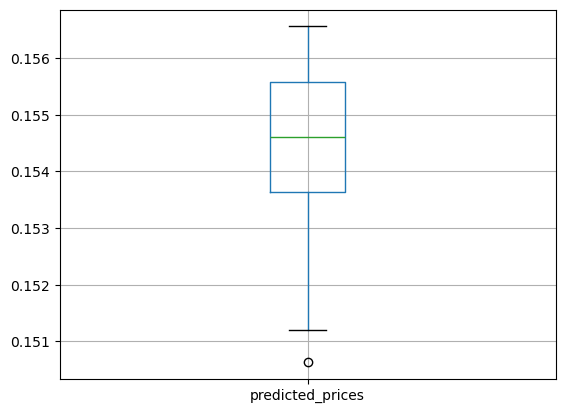

In [151]:
test_df.boxplot(column=['predicted_prices'])
plt.show()

In [29]:
test_df['predicted_prices'].describe().to_csv("Prediction_Description_SARIMA_011.csv")

In [32]:
test_df.to_csv("results_SARIMA_010_011.csv")